<a href="https://colab.research.google.com/github/Sjing2/SJ_practice/blob/master/crawl_test_1/crawl_test_1/spiders/11_CNM%EB%AA%A8%EB%8D%B8_%ED%8C%8C%ED%97%A4%EC%B9%98%EA%B8%B0_snap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snap-stanford

     |████████████████████████████████| 11.2MB 3.7MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np

G1: Nodes 6002, Edges 6204
Number of Nodes: 6002
Number of nodes of zero degree: 0
Average degree: 2.0673108963678772
Size of largest strongly connected component: 4813
Number of connected components: 14
Number of communities: 55
Largest community: 251
Smallest community: 3
Community 4: [950216795, 819657458, 1303329532, 665481825, 334278857, -672996477, 1446929037, 372603223, 1360855002, 781462702, 1127312106, -118411192, -2104014443, 1179822620, -1499910330, 1256070142, 606511721, 1956376964, 1121842136, -1752158723, -604343307, -83895585, -71654611, 1271296792, 1021296758, -1586843482, -2060323666, 1089868848, 1483413108, -1652367269, 871731054, -78685833, 699785411, -396592961, 1449549278, -802252594, -733880170, 1247627659, 41720441, -632293987, -330804260, -1265712045, 1619869665, 1269263207, -1117326596, 1653231723, 1127175046, 1492711388, -43430948, 1921871617, 273306393, 2002607245, 468789687, -73041076, 2099222085, 1633190465, -1602208570, 1966209948, 1476896117, 1139617015, 

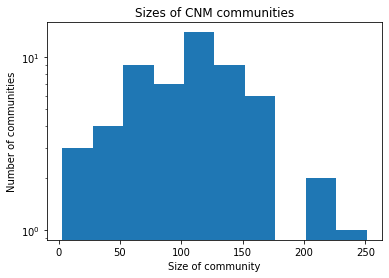

The modularity of the network is 0.950107


<Figure size 432x288 with 0 Axes>

In [5]:
## 충청 파일로 돌린거

import snap
import matplotlib.pyplot as plt

G1 = snap.LoadEdgeList(snap.PUNGraph, "/content/gdrive/My Drive/프로젝트/cc_2.txt", 0, 1) # PUNGraph -> 다른걸로 조정가능한듯?

print("G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges()))
print("Number of Nodes: %d" % G1.GetNodes())

# 1.6 number of nodes of zero degree
print("Number of nodes of zero degree: %d" % snap.CntDegNodes(G1, 0))

# Get in degree distribution
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(G1, DegToCntV)
degree = []
numNodes = []
sumDegrees = 0
for item in DegToCntV:
    degree.append(item.GetVal1())
    numNodes.append(item.GetVal2())
    sumDegrees += item.GetVal1()*item.GetVal2()
    #print("%d nodes with in-degree %d" % (item.GetVal2(), item.GetVal1()))

plt.plot(degree, numNodes)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('frequency')
plt.xlabel('degree')
plt.title('Degree distribution')
plt.savefig('degreeDist.png')
plt.clf()

# Get average degree
print("Average degree:", sumDegrees/float(sum(numNodes)))

# Get largest strongly connected component
MxScc = snap.GetMxScc(G1)
print("Size of largest strongly connected component:", MxScc.GetNodes())

# Get strongly connected components
Components = snap.TCnComV()
snap.GetWccs(G1, Components)
wcc_sizes = []
for CnCom in Components:
    wcc_sizes.append(CnCom.Len())

print("Number of connected components:", len(wcc_sizes))

# Clauset-Newman-Moore community detection
CmtyV = snap.TCnComV()
modularity = snap.CommunityCNM(G1, CmtyV)
count = 0
sizes = []
communities = []
for Cmty in CmtyV:
    listcmty = []
    for NI in Cmty:
        listcmty.append(NI)

    communities.append(listcmty)
    count += 1
    sizes.append(len(listcmty))
print("Number of communities:", count)
print("Largest community:", max(sizes))
print("Smallest community:", min(sizes))
print("Community 4:", communities[4])
print("Community 11:", communities[11])
print("Community 21:", communities[21])
print("Community 36:", communities[36])

# plot histogram of community sizes
sizes.sort()
plt.hist(sizes, log=True)
plt.xlabel("Size of community")
plt.ylabel("Number of communities")
plt.title("Sizes of CNM communities")
plt.show()
plt.savefig("cnm-sizes.png")
#print("Size of communities:", sizes)
print("The modularity of the network is %f" % modularity)

G1: Nodes 87676, Edges 100000
Number of Nodes: 87676
Number of nodes of zero degree: 0
Average degree: 2.2811259637757195
Size of largest strongly connected component: 58801
Number of connected components: 11237
Number of communities: 11431
Largest community: 7280
Smallest community: 2
Community 21: [179, 183]
Community 101: [2496, 2525, 2530, 2511, 2524, 17341, 66647, 71523, 109179]
Community 10,000: [184005, 154303]


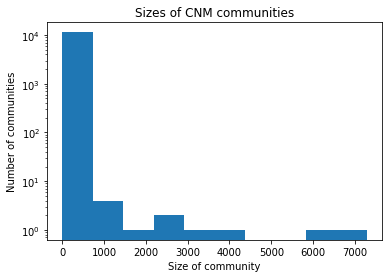

The modularity of the network is 0.841188


<Figure size 432x288 with 0 Axes>

In [ ]:
## github에 있는 데이터

import snap
import matplotlib.pyplot as plt

G1 = snap.LoadEdgeList(snap.PUNGraph, "sample.txt", 0, 1) # PUNGraph -> 다른걸로 조정가능한듯?

print("G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges()))
print("Number of Nodes: %d" % G1.GetNodes())

# 1.6 number of nodes of zero degree
print("Number of nodes of zero degree: %d" % snap.CntDegNodes(G1, 0))

# Get in degree distribution
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(G1, DegToCntV)
degree = []
numNodes = []
sumDegrees = 0
for item in DegToCntV:
    degree.append(item.GetVal1())
    numNodes.append(item.GetVal2())
    sumDegrees += item.GetVal1()*item.GetVal2()
    #print("%d nodes with in-degree %d" % (item.GetVal2(), item.GetVal1()))

plt.plot(degree, numNodes)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('frequency')
plt.xlabel('degree')
plt.title('Degree distribution')
plt.savefig('degreeDist.png')
plt.clf()

# Get average degree
print("Average degree:", sumDegrees/float(sum(numNodes)))

# Get largest strongly connected component
MxScc = snap.GetMxScc(G1)
print("Size of largest strongly connected component:", MxScc.GetNodes())

# Get strongly connected components
Components = snap.TCnComV()
snap.GetWccs(G1, Components)
wcc_sizes = []
for CnCom in Components:
    wcc_sizes.append(CnCom.Len())

print("Number of connected components:", len(wcc_sizes))

# Clauset-Newman-Moore community detection
CmtyV = snap.TCnComV()
modularity = snap.CommunityCNM(G1, CmtyV)
count = 0
sizes = []
communities = []
for Cmty in CmtyV:
    listcmty = []
    for NI in Cmty:
        listcmty.append(NI)

    communities.append(listcmty)
    count += 1
    sizes.append(len(listcmty))
print("Number of communities:", count)
print("Largest community:", max(sizes))
print("Smallest community:", min(sizes))
print("Community 21:", communities[21])
print("Community 101:", communities[101])
print("Community 10,000:", communities[10000])

# plot histogram of community sizes
sizes.sort()
plt.hist(sizes, log=True)
plt.xlabel("Size of community")
plt.ylabel("Number of communities")
plt.title("Sizes of CNM communities")
plt.show()
plt.savefig("cnm-sizes.png")
#print("Size of communities:", sizes)
print("The modularity of the network is %f" % modularity)